In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection


c:\users\annisa\anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dfA = pd.read_csv("wbc.csv")

In [3]:
dfA=dfA.replace('?',np.nan)
dfA['bare_nuclei'] = pd.to_numeric(dfA.bare_nuclei.fillna(dfA.bare_nuclei.median()))
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness       699 non-null int64
cell_size             699 non-null int64
cell_shape            699 non-null int64
marginal_adhesion     699 non-null int64
epitelial_cellsize    699 non-null int64
bare_nuclei           699 non-null float64
bland_chromatin       699 non-null int64
normal_nucleoli       699 non-null int64
mitoses               699 non-null int64
jenis                 699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [4]:
X = dfA.drop([dfA.columns[-1]], axis=1)
y = dfA.jenis.map({2: 0, 4: 1})

In [5]:
test_size=0.33

In [6]:
random_state=42

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [8]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [9]:
from sklearn import metrics

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from __future__ import print_function
from sklearn.metrics import classification_report

In [11]:
classifier = XGBClassifier()

In [12]:
from sklearn.cross_validation import StratifiedKFold

In [13]:
cv = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=random_state)

In [14]:
from sklearn.metrics import confusion_matrix
def cost_breast_cancer(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    FN = CM[1][0]
    FP = CM[0][1]
    costBC=((228.35*FP)+(2850000*FN))
    return costBC

In [15]:
def specificity(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    nilai=(TN/(FP+TN))
    return nilai

In [16]:
from sklearn.metrics import make_scorer
my_custom_scorer=make_scorer(cost_breast_cancer, greater_is_better=False)
score_specificity=make_scorer(specificity, greater_is_better=True)

In [17]:
print(__doc__)

# Loading the Digits dataset
#digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(dfA)


# Set the parameters by cross-validation
tuned_parameters ={'n_estimators': [10,20,30,50],
                    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.],
                    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.],
                    'reg_alpha': [0., 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1., 5., 10.],
                    'reg_lambda': [0., 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1., 5., 10.],
                    'scale_pos_weight': np.linspace(1., (y_train == 2).sum() / y_train.sum(), 10)
                   }    

                  
params_fixed = {
    'objective': 'binary:logistic',
    'silent': 1
}
scores = [my_custom_scorer]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(estimator=XGBClassifier(**params_fixed, seed=random_state),
    param_distributions=tuned_parameters, cv=cv, scoring=my_custom_scorer)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for make_scorer(cost_breast_cancer, greater_is_better=False)

Best parameters set found on development set:

{'n_estimators': 10, 'colsample_bytree': 0.6, 'subsample': 0.5, 'reg_lambda': 0.0, 'scale_pos_weight': 0.88888888888888884, 'reg_alpha': 0.01}

Grid scores on development set:

-10559706.139 (+/-8551163.777) for {'n_estimators': 30, 'colsample_bytree': 1.0, 'subsample': 0.9, 'reg_lambda': 0.005, 'scale_pos_weight': 0.22222222222222232, 'reg_alpha': 10.0}
-2557897.237 (+/-6491921.821) for {'n_estimators': 50, 'colsample_bytree': 0.5, 'subsample': 1.0, 'reg_lambda': 0.5, 'scale_pos_weight': 0.66666666666666674, 'reg_alpha': 0.005}
-1705423.889 (+/-4567186.078) for {'n_estimators': 10, 'colsample_bytree': 0.6, 'subsample': 0.5, 'reg_lambda': 0.0, 'scale_pos_weight': 0.88888888888888884, 'reg_alpha': 0.01}
-1985528.674 (+/-5128857.847) for {'n_estimators': 20, 'colsample_bytree': 0.8, 'subsamp

In [18]:
clf.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0.01, reg_lambda=0.0,
       scale_pos_weight=0.88888888888888884, seed=42, silent=1,
       subsample=0.5)

In [19]:
xgbBestA=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0.01, reg_lambda=0.0,
       scale_pos_weight=0.88888888888888884, seed=42, silent=1,
       subsample=0.5)

In [20]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [21]:
scores1=cross_val_score(xgbBestA,X_train,y_train,cv=cv)

In [22]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores1.mean(), scores1.std() * 2))

Accuracy: 0.9592 (+/- 0.0683)


In [23]:
scores=cross_val_score(xgbBestA,X_train,y_train,cv=cv,scoring='recall')

In [24]:
print("recall: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

recall: 0.9632 (+/- 0.0975)


In [25]:
scores2=cross_val_score(xgbBestA,X_train,y_train,cv=cv,scoring=score_specificity)

In [26]:
print("Specificity: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std() * 2))

Specificity: 0.9571 (+/- 0.0984)


In [27]:
xgbBestA.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0.01, reg_lambda=0.0,
       scale_pos_weight=0.8888888888888888, seed=42, silent=1,
       subsample=0.5)

In [28]:
classifier=xgbBestA

In [29]:
names='XGBoost-Dataset A'

In [30]:
score=xgbBestA.predict_proba(X_test)

In [31]:
import matplotlib.pyplot as plt

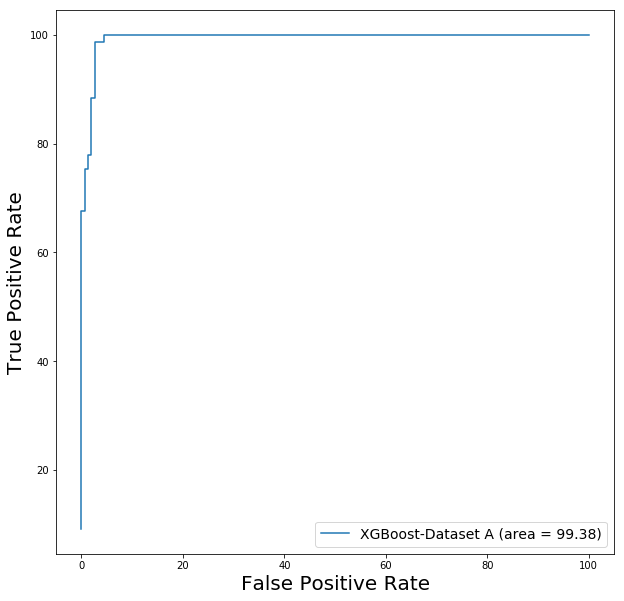

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
fpr, tpr, thresholds = roc_curve(y_test, score[:,1],pos_label=1)
auc = roc_auc_score(y_test, score[:,1])
plt.plot(fpr*100, tpr*100, label='%s (area = %.2f)' % (names, auc*100))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.legend(prop={'size':14})
ax.set_xlabel('False Positive Rate',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
plt.show()